In [5]:
%matplotlib inline

In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [7]:
WIDTH, HEIGHT, DPI = 700, 700, 100

# EFeld
![](https://images.gutefrage.net/media/fragen-antworten/bilder/344662334/0_big.jpg?v=1586367967427)

In [8]:
def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = ((x-r0[0])**2 + (y-r0[1])**2)**1.5
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

Grid of x, y points

In [9]:
nx, ny = 128, 128
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)
X, Y = np.meshgrid(x, y)

## add Charge

In [10]:
charges=[]
def addCharge(q, x, y):
    charges.append((q, (x, y)))

# 2 gegensätzliche Punktladungen

In [7]:
addCharge(1, 0, 1)
addCharge(-1, 0, -1)

# 2 gleiche Punktladungen

In [11]:
addCharge(1, 0, 1)
addCharge(1, 0, -1)

# 3 Punktladungen

In [15]:
addCharge(1, 1, 1)
addCharge(1, -1, 1)
addCharge(1, 0, -1)

# Kondensator

In [11]:
nq, d = 20, 2
for i in range(nq):
    addCharge(1, i/(nq-1)*2-1, -d/2)
    addCharge(-1, i/(nq-1)*2-1, d/2)

Electric field vector, E=(Ex, Ey), as separate components

In [12]:
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

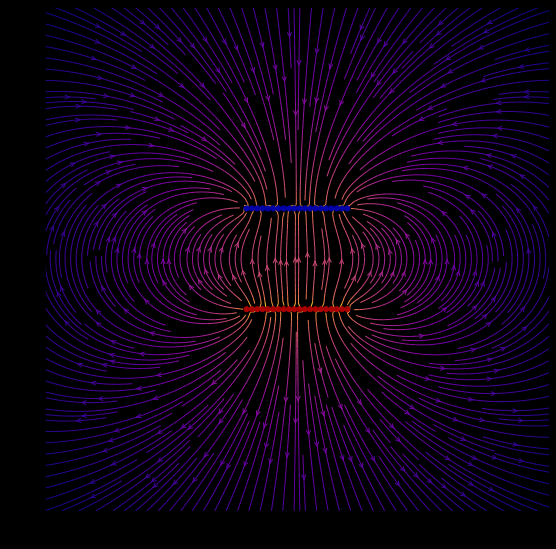

In [13]:
fig = plt.figure(figsize=(WIDTH/DPI, HEIGHT/DPI), facecolor='k')
ax = fig.add_subplot(facecolor='k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.plasma,
              density=3, arrowstyle='->')

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0], zorder=10))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')

https://scipython.com/blog/the-electric-field-of-a-capacitor/